Introduccion al problema

In [1]:
# %pip install gymnasium

### Windows:

method 1

In [2]:
# %pip install swig

In [3]:
# %pip install gymnasium[box2d]

method 2

In [4]:
# %pip install swig

In [5]:
# %pip install ufal.pybox2d

In [6]:
# %pip install pygame

### Linux:

In [7]:
# %pip install gymnasium[box2d]

https://gymnasium.farama.org/environments/box2d/lunar_lander/

In [8]:
from lunar import LunarLanderEnv

Tensorflow or Torch

In [9]:
import torch

In [10]:
# Initialize the environment
lunar = LunarLanderEnv()
print(type(lunar.env.observation_space))
print(type(lunar.env.action_space))

<class 'gymnasium.spaces.box.Box'>
<class 'gymnasium.spaces.discrete.Discrete'>


El espacio de acciones es un valor del 0 al 3 que indica que acciones tomará el modulo lunar para esa iteración.

en concreto son las siguientes:

|value| action                        |
|-----|-------------------------------|
| 0   | do nothing                    |
| 1   | fire left orientation engine  |
| 2   | fire main engine              |
| 3   | fire right orientation engine |


In [11]:
lunar.env.action_space

Discrete(4)

El espacio de observaciones son un conjunto de valores flotantes y booleanos que indica el estado del modulo lunar.

en concreto son las siguientes:

|value| observation                               |
|-----|-------------------------------------------|
| 0   | coordenada X (float)                      |
| 1   | coordenada Y (float)                      |
| 2   | velocidad lineal X (float)                |
| 3   | velocidad lineal Y (float)                |
| 4   | Angulo en radianes desde -2π a +2π (float)|
| 5   | Velocidad angula (float)                  |
| 6   | Contacto de la pierna Izquierda (bool)    |
| 7   | Contacto de la pierna Derecha (bool)      |

In [12]:
# se muestran los valores minimos y maximos del espacio de observaciones.
lunar.env.observation_space

Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)

In [13]:
observation_count = lunar.env.observation_space.shape[0] 
action_count = lunar.env.action_space.n

print(f"observations: {observation_count}, actions: {action_count}")

observations: 8, actions: 4


In [14]:
#valores minimos y maximos para las observaciones.
print(lunar.env.observation_space.low) 
print(lunar.env.observation_space.high)

[ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ]
[ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ]


Sample ofrece una combinacion aleatoria del conjunto.

In [15]:
print(lunar.env.action_space.sample())  # Take a random action

2


In [16]:
print(lunar.env.observation_space.sample())  # Sample a random observation

[ 1.9593114  1.5006406  8.66594    3.3459852  4.22054   -9.266322
  0.4218479  0.8738605]


Running a random episode.

In [17]:
def test_lunar_lander(steps_to_run_before_pause, agent, episodes=1):
    """
    Test the Lunar Lander environment with a given agent.
    
    Parameters:
    steps_to_run_before_pause (int): Number of steps to run before pausing for user input.
    agent: The agent to be tested in the environment.
    
    Returns:
    None
    """
    # Initialize the environment
    lunar = LunarLanderEnv(render_mode="human")
    
    if(agent is not None):
        # Set the agent's environment
        agent.lunar = lunar
        
    for _ in range(episodes):
        counter, score = 0, 0

        while True:
            if steps_to_run_before_pause != 0 and counter % steps_to_run_before_pause == 0:
                import time
                time.sleep(0.6)

            if(agent is not None):
                _, reward, done, action = agent.act()
                
            else:
                # Sample a random action from the action space
                action = lunar.env.action_space.sample()
            
                # Take a step in the environment
                _, reward, done = lunar.take_action(action, verbose=True)
                
            score += reward
            
            counter += 1
            
            if done:
                print(f"Episode finished, score: {score}")
                break
        if(agent is not None):
            # Reset the agent's environment for the next episode
            agent.lunar.reset()
        else:
            # Reset the environment for the next episode
            lunar.reset()
        
    # Close the environment
    lunar.close()

In [18]:
test_lunar_lander(steps_to_run_before_pause=0, agent=None, episodes=1)

Step taken: 2, New state: [-0.00392008  1.4300704  -0.19092725  0.42786255  0.00548706  0.06228095
  0.          0.        ], Reward: -1.3158574499011764, Done: False
Step taken: 0, New state: [-0.00579805  1.4390987  -0.19093733  0.40123644  0.00859861  0.06223668
  0.          0.        ], Reward: 1.2032139671909476, Done: False
Step taken: 0, New state: [-0.00767603  1.4475268  -0.19094643  0.3745681   0.01171006  0.06223458
  0.          0.        ], Reward: 1.2372145382892938, Done: False
Step taken: 3, New state: [-0.00946322  1.4553671  -0.17954841  0.34844893  0.01253131  0.01642671
  0.          0.        ], Reward: 1.9471012888184316, Done: False
Step taken: 2, New state: [-1.1431694e-02  1.4638822e+00 -1.9686171e-01  3.7844795e-01
  1.2537188e-02  1.1772697e-04  0.0000000e+00  0.0000000e+00], Reward: -4.613530746127696, Done: False
Step taken: 3, New state: [-0.01333551  1.4717945  -0.18873599  0.3516674   0.01091472 -0.03245211
  0.          0.        ], Reward: 2.086939053

DQN

In [19]:
from DQN import DQNAgent
lunar = LunarLanderEnv(render_mode=None)



Train

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)
Starting training...
--------------- Episode: 1/1500 | Steps:116 | Score: -294.68 | Avg Loss: 78.0866 | Epsilon: 0.995 | Q-current mean values: -0.86 | Q-target mean values: -2.41 ---------------
--------------- Episode: 2/1500 | Steps:76 | Score: -121.79 | Avg Loss: 111.8556 | Epsilon: 0.990 | Q-current mean values: -2.05 | Q-target mean values: -2.27 ---------------
--------------- Episode: 3/1500 | Steps:118 | Score: -221.43 | Avg Loss: 115.6058 | Epsilon: 0.985 | Q-current mean values: -2.12 | Q-target mean values: -2.28 ---------------
--------------- Episode: 4/1500 | Steps:74 | Score: -170.04 | Avg Loss: 85.9256 | Epsilon: 0.980 | Q-current mean values: -1.86 | Q-target mean values: -1.98 ---------------
--

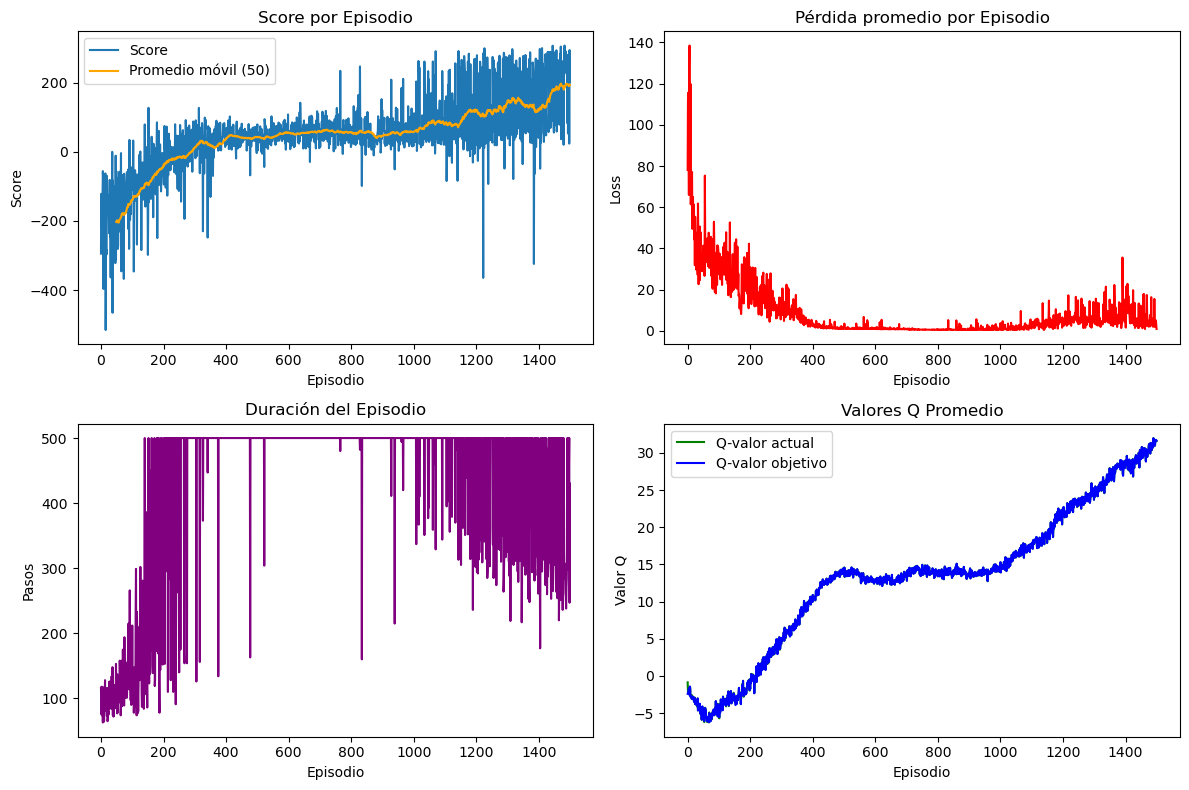

In [20]:
#Los parametros más importantes son los marcados con un comentario
agent = DQNAgent(lunar)
# agent.load_model("modelos/modelo_DQN.h5") <- si se quiere seguir entrenando el modelo anteriormente guardado
agent.train(nombre_archivo="modelos/modelo_DQN", save_graphs=True, save_every_500=True)

Test

In [21]:
# agent with epsilon = 0.0 (no exploration)
agent = DQNAgent(lunar, epsilon=0.0)
agent.load_model("modelos/modelo_DQN.h5")

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)
Model loaded from modelos/modelo_DQN.h5


In [25]:
test_lunar_lander(steps_to_run_before_pause=0, agent=agent, episodes=1)

Episode finished, score: 231.63164510138796
Environment closed.


Episode finished, score: 177.47851554293467
Episode finished, score: 119.82285765842974
Episode finished, score: 140.84487819697858
Episode finished, score: 264.2916577848118
Episode finished, score: 175.5356204274674
Episode finished, score: 189.66506075410166
Episode finished, score: 94.13666899375647
Episode finished, score: 261.86307577328506
Episode finished, score: 275.1125962719085
Episode finished, score: 187.56421574995363
Episode finished, score: 265.56497494174397
Episode finished, score: 304.527949796863
Episode finished, score: 15.023802425958635
Episode finished, score: 237.60102624505126
Episode finished, score: 300.0005761583197
Episode finished, score: 176.08150048642023
Episode finished, score: 263.48242551448874
Episode finished, score: 273.7177772948669
Episode finished, score: 295.3744667955543
Episode finished, score: 255.98898429321767
Episode finished, score: 272.10062289487246
Episode finished, score: 262.1229338654648
Episode finished, score: 223.5586508146013

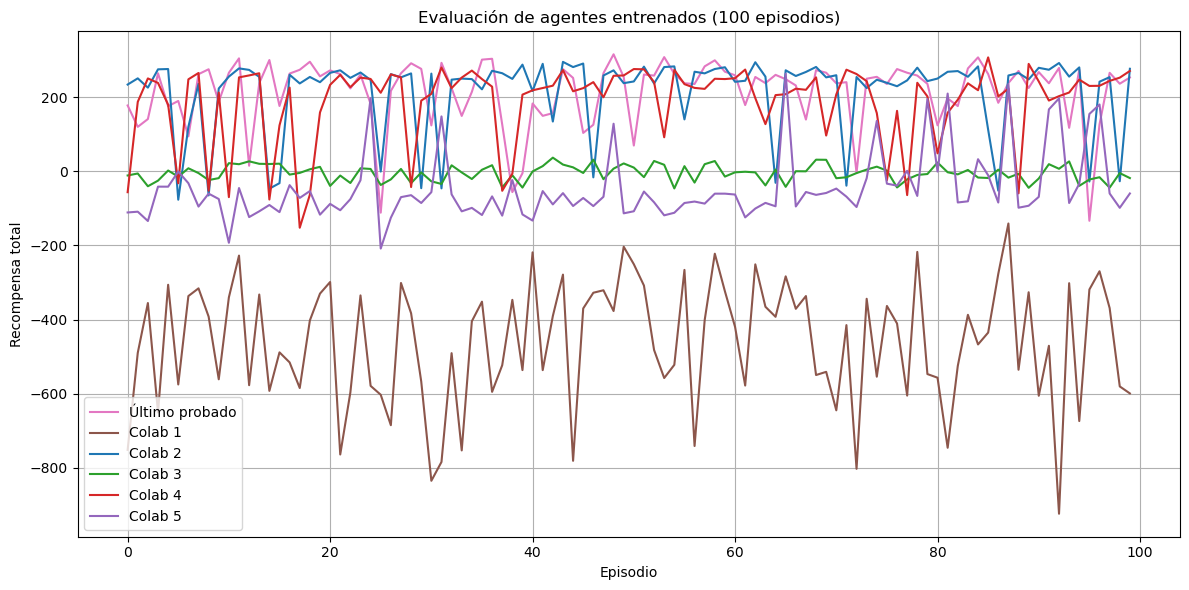


--- Resolution Percentage (Score > 100) ---
Último probado: 92.00%
Colab 1 Resolution: 0.00%
Colab 2 Resolution: 87.00%
Colab 3 Resolution: 0.00%
Colab 4 Resolution: 84.00%
Colab 5 Resolution: 12.00%


In [23]:
import matplotlib.pyplot as plt

def evaluate_agent(agent, episodes=100):
    rewards = []
    lunar = LunarLanderEnv(render_mode=None)
    
    if(agent is not None):
        # Set the agent's environment
        agent.lunar = lunar
        
    for _ in range(episodes):
        counter, score = 0, 0

        while True:


            if(agent is not None):
                _, reward, done, action = agent.act()
                
            else:
                # Sample a random action from the action space
                action = lunar.env.action_space.sample()
            
                # Take a step in the environment
                _, reward, done = lunar.take_action(action, verbose=True)
                
            score += reward
            
            counter += 1
            
            if done:
                print(f"Episode finished, score: {score}")
                rewards.append(score)
                break
        if(agent is not None):
            # Reset the agent's environment for the next episode
            agent.lunar.reset()
        else:
            # Reset the environment for the next episode
            lunar.reset()
        
    # Close the environment
    
    lunar.close()
    return rewards

def calculate_resolution_percentage(rewards):
    """
    Calculates the percentage of episodes where the total score was greater than 100.
    """
    resolved_episodes = sum(1 for reward in rewards if reward > 100)
    total_episodes = len(rewards)
    if total_episodes == 0:
        return 0
    return (resolved_episodes / total_episodes) * 100


rewards_0 = evaluate_agent(agent)

# Cargar todos los modelos
agent_colab1 = DQNAgent(lunar,epsilon=0.0, hidden_size=256)
agent_colab1.load_model("modelos/Google colab 1/modelo_DQN.h5")
rewards_1 = evaluate_agent(agent_colab1)

agent_colab2 = DQNAgent(lunar,epsilon=0.0, hidden_size=128)
agent_colab2.load_model("modelos/Google colab 2/modelo_DQN.h5")
rewards_2 = evaluate_agent(agent_colab2)

agent_colab3 = DQNAgent(lunar,epsilon=0.0, hidden_size=128)
agent_colab3.load_model("modelos/Google colab 3/modelo_DQN.h5")
rewards_3 = evaluate_agent(agent_colab3)

agent_colab4 = DQNAgent(lunar,epsilon=0.0, hidden_size=256)
agent_colab4.load_model("modelos/Google colab 4/modelo_DQN.h5")
rewards_4 = evaluate_agent(agent_colab4)

agent_colab5 = DQNAgent(lunar,epsilon=0.0, hidden_size=64)
agent_colab5.load_model("modelos/Google colab 5/modelo_DQN.h5")
rewards_5 = evaluate_agent(agent_colab5)


colors = ['#e377c2', '#8c564b', '#1f77b4', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(12, 6))
plt.plot(rewards_0, label='Último probado', color=colors[0])
plt.plot(rewards_1, label='Colab 1', color=colors[1])
plt.plot(rewards_2, label='Colab 2', color=colors[2])
plt.plot(rewards_3, label='Colab 3', color=colors[3])
plt.plot(rewards_4, label='Colab 4', color=colors[4])
plt.plot(rewards_5, label='Colab 5', color=colors[5])

plt.title('Evaluación de agentes entrenados (100 episodios)')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Último probado: {calculate_resolution_percentage(rewards_0):.2f}%")
print(f"Colab 1 Resolution: {calculate_resolution_percentage(rewards_1):.2f}%")
print(f"Colab 2 Resolution: {calculate_resolution_percentage(rewards_2):.2f}%")
print(f"Colab 3 Resolution: {calculate_resolution_percentage(rewards_3):.2f}%")
print(f"Colab 4 Resolution: {calculate_resolution_percentage(rewards_4):.2f}%")
print(f"Colab 5 Resolution: {calculate_resolution_percentage(rewards_5):.2f}%")

